# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
import sklearn
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Data generation
moon = sklearn.datasets.make_moons(n_samples=300, shuffle=True, noise=None, random_state=None)
moon

(array([[ 9.50402855e-01,  3.11021562e-01],
        [ 1.79505859e-02,  3.11376173e-01],
        [ 8.30736770e-01,  5.56665446e-01],
        [ 1.96816230e+00,  2.49676699e-01],
        [-1.57475624e-01,  9.87522875e-01],
        [ 2.22270140e-04,  4.78917048e-01],
        [ 1.59966121e+00, -3.00253979e-01],
        [ 5.65392191e-01,  8.24822205e-01],
        [ 7.59897036e-01, -4.70747427e-01],
        [ 9.26271161e-01, -4.97278325e-01],
        [ 3.55434644e-03,  4.15761888e-01],
        [-3.21023485e-01,  9.47071234e-01],
        [ 9.77854387e-01,  2.09286403e-01],
        [ 8.42524376e-01, -4.87522875e-01],
        [ 9.05261977e-01, -4.95502239e-01],
        [ 9.03566283e-01,  4.28448330e-01],
        [-1.98966171e-01,  9.80006358e-01],
        [-9.36446374e-01,  3.50810759e-01],
        [ 1.38024716e+00, -4.24884909e-01],
        [ 1.99983846e-03,  4.36788628e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 1.95040286e+00,  1.88978438e-01],
        [ 1.32102349e+00, -4.470

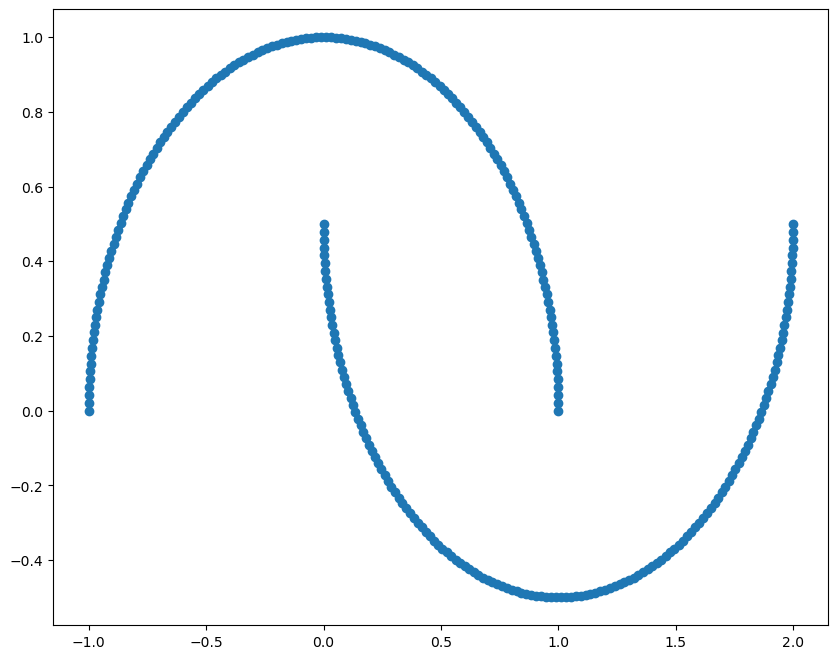

In [2]:
### This function allows to plot the two moons
df = pd.DataFrame(moon[0])
plt.figure(figsize=(10, 8))

plt.scatter(df[0], df[1])
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

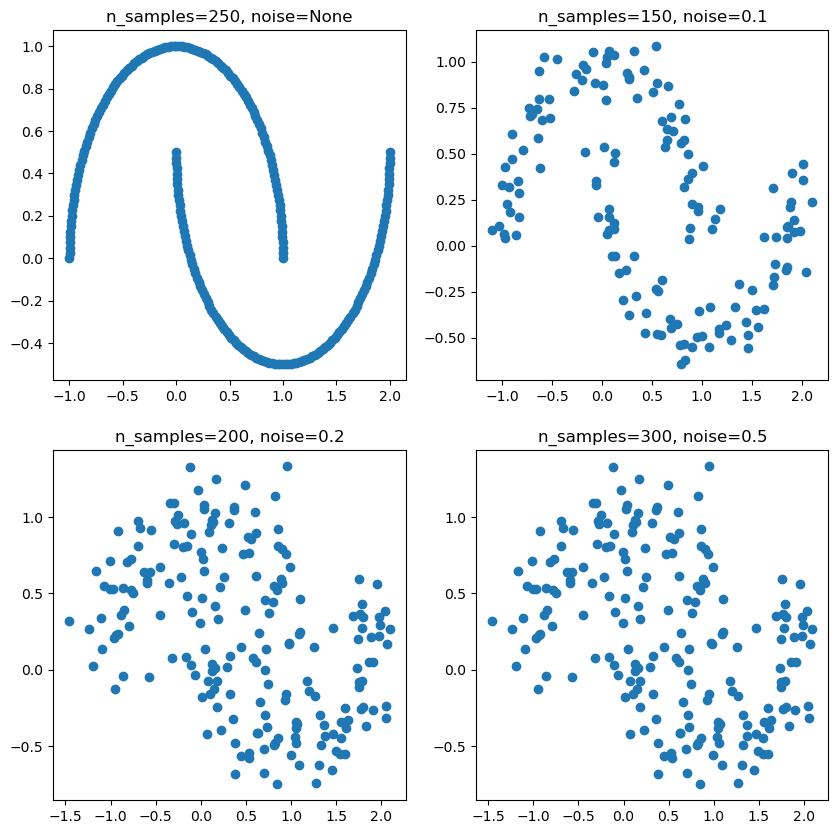

In [3]:
moon_01 = sklearn.datasets.make_moons(n_samples=250, shuffle=True, noise=None, random_state=None)
moon_02 = sklearn.datasets.make_moons(n_samples=150, shuffle=True, noise=0.1, random_state=None)
moon_03 = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.2, random_state=None)
moon_04 = sklearn.datasets.make_moons(n_samples=300, shuffle=True, noise=0.5, random_state=None)


df_01 = pd.DataFrame(moon_01[0])
df_02 = pd.DataFrame(moon_02[0])
df_03 = pd.DataFrame(moon_03[0])
df_04 = pd.DataFrame(moon_03[0])


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(df_01[0], df_01[1])
axs[0, 0].set_title('n_samples=250, noise=None')

axs[0, 1].scatter(df_02[0], df_02[1])
axs[0, 1].set_title('n_samples=150, noise=0.1')

axs[1, 0].scatter(df_03[0], df_03[1])
axs[1, 0].set_title('n_samples=200, noise=0.2')

axs[1, 1].scatter(df_04[0], df_04[1])
axs[1, 1].set_title('n_samples=300, noise=0.5')


plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

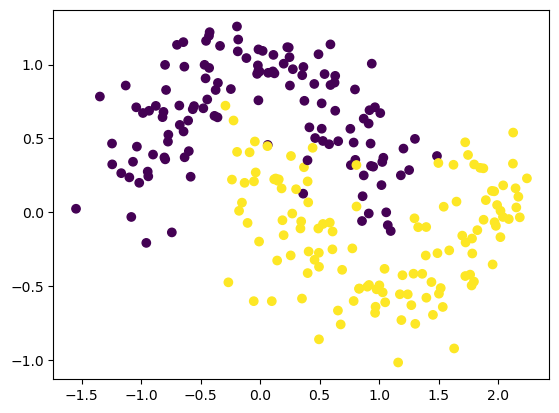

In [4]:
from sklearn.model_selection import train_test_split
X ,y = sklearn.datasets.make_moons(n_samples=250, shuffle=True, noise=0.2, random_state=0)

X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.30,shuffle=True)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [5]:
def initialize_model():
    
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [6]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [7]:
model.fit(X , y ,batch_size=8, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6666 - accuracy: 0.5560
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6160
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.7760
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.8400
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.8680
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5784 - accuracy: 0.8680
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.8680
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.8680
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.8680
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.8680
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8840
Epoch 84/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8840
Epoch 85/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.8840
Epoch 86/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2595 - accuracy: 0.8840
Epoch 87/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.8840
Epoch 88/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.8840
Epoch 89/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2585 - accuracy: 0.8840
Epoch 90/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2583 - accuracy: 0.8840
Epoch 91/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.8840
Epoch 92/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2575 - accuracy: 0.8840
Epoch 93/200


32/32 [==============================] - 0s 1ms/step - loss: 0.2446 - accuracy: 0.8960
Epoch 165/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.8960
Epoch 166/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.8880
Epoch 167/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8920
Epoch 168/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2443 - accuracy: 0.8960
Epoch 169/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.8960
Epoch 170/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.8880
Epoch 171/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8920
Epoch 172/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8920
Epoch 173/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2440 - accuracy: 0.8920
Epoc

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

# Accessing the history
# You can access the data in the history object like so –

# hist = model.fit(X_train, y_train,
#                     batch_size=batch_size,
#                     nb_epoch=nb_epoch,
#                     validation_data=(X_test, y_test))
# So, what's in the history? We can access the metrics collected in the history object by accessing its keys.

# print(hist.history.keys())

# Output: dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [8]:
model.history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x242788aa670>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6666096448898315,
   0.6492953300476074,
   0.6318254470825195,
   0.6143769025802612,
   0.5969687700271606,
   0.5784143805503845,
   0.5588775277137756,
   0.5401294827461243,
   0.5210301876068115,
   0.5012404322624207,
   0.480785608291626,
   0.4594268500804901,
   0.4394099712371826,
   0.42055851221084595,
   0.40262290835380554,
   0.38796982169151306,
   0.37492838501930237,
   0.3631952106952667,
   0.35309797525405884,
   0.34430208802223206,
   0.3372015953063965,
   0.3309391736984253,
   0.32525715231895447,
   0.3204152286052704,
   0.3162790834903717,
   0.31260713934898376,
   0.30915406346321106,
   0.3059910833835602,
   0.30342671275138855,
   0.3012170195579529,
   0.2999168336391449,
   0.2973811626434326,
   0.29568594694137573,
   0.293641597032547,
   0.2924796938896179,
   0.2910361289978

❓ Plot the history of the train loss using the following function

In [9]:
df= pd.DataFrame(model.history.history)

In [10]:
df

,loss,accuracy
0,0.666610,0.556
1,0.649295,0.616
2,0.631825,0.776
3,0.614377,0.840
4,0.596969,0.868
...,...,...
195,0.242381,0.892
196,0.242525,0.896
197,0.242529,0.896
198,0.242526,0.896


<AxesSubplot:>

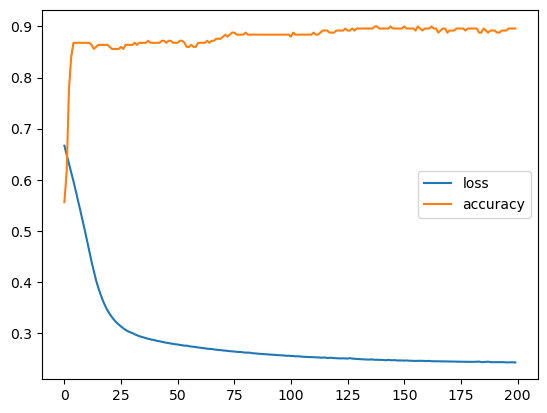

In [11]:
df.plot()

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [12]:
y_pred = model.predict(X_test)
print(y_pred)

3/3 [==============================] - 0s 7ms/step
[[5.7124615e-01]
 [9.9456292e-01]
 [3.7344161e-01]
 [9.4609165e-01]
 [9.8877251e-01]
 [9.9028552e-01]
 [9.8852545e-01]
 [6.7570454e-01]
 [9.7711974e-01]
 [8.1195660e-02]
 [9.7645527e-01]
 [2.2290139e-02]
 [9.6554726e-01]
 [1.4112297e-01]
 [9.8801279e-01]
 [3.1559557e-01]
 [7.7983326e-01]
 [2.0266054e-02]
 [8.8401192e-01]
 [9.3349320e-01]
 [2.0517032e-03]
 [5.9219846e-03]
 [3.5372891e-02]
 [1.5927625e-01]
 [2.6379414e-02]
 [5.2667182e-04]
 [3.3203345e-03]
 [9.9193418e-01]
 [9.9150640e-01]
 [9.9249959e-01]
 [6.1615950e-01]
 [9.1849375e-01]
 [6.8783981e-01]
 [1.8593294e-03]
 [9.9570053e-03]
 [9.8910749e-01]
 [9.2897844e-01]
 [2.6041609e-05]
 [5.0046656e-04]
 [9.7750467e-01]
 [9.3795532e-01]
 [3.4789523e-01]
 [9.9133575e-01]
 [7.9649246e-01]
 [9.3631726e-03]
 [9.9142867e-01]
 [2.5221679e-04]
 [8.4555101e-01]
 [1.1066657e-04]
 [2.2766875e-01]
 [8.6128801e-02]
 [9.6929550e-01]
 [1.0034869e-02]
 [5.6205827e-01]
 [2.4625221e-03]
 [1.2679806e-0

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [13]:
accuracy = model.evaluate(X_test,y_test)
print(accuracy)

3/3 [==============================] - 0s 8ms/step - loss: 0.1836 - accuracy: 0.9067
[0.18364867568016052, 0.9066666960716248]


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [14]:
accuracy = float(accuracy[1])
print(accuracy)

0.9066666960716248


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

1940/1940 [==============================] - 2s 975us/step


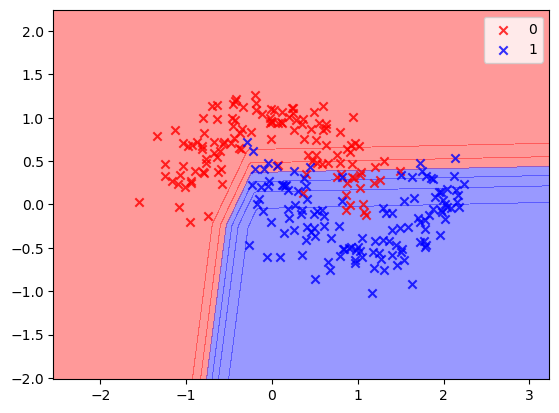

In [15]:
from utils.plots import plot_decision_regions

plot_decision_regions(X, y, model, test_idx=None, resolution=0.02)

1842/1842 [==============================] - 2s 838us/step


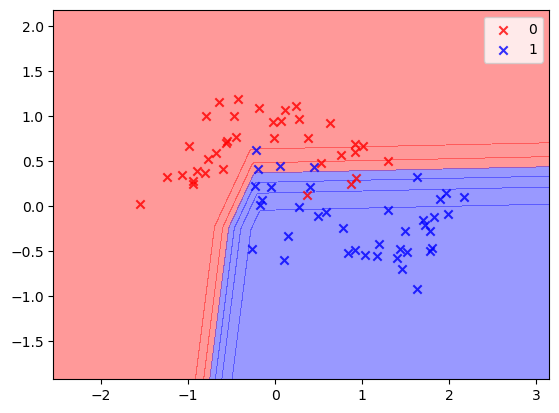

In [16]:
plot_decision_regions(X_test, y_test, model, test_idx=None, resolution=0.02)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7763 - accuracy: 0.2343
Epoch 2/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7503 - accuracy: 0.3886
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7277 - accuracy: 0.4914
Epoch 4/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.4914
Epoch 5/500
22/22 [==============================] - 0s 1m

22/22 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8514
Epoch 77/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8514
Epoch 78/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8514
Epoch 79/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8514
Epoch 80/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8514
Epoch 81/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8514
Epoch 82/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8514
Epoch 83/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8571
Epoch 84/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3538 - accuracy: 0.8571
Epoch 85/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8629
Epoch 86/500


22/22 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8629
Epoch 158/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3119 - accuracy: 0.8629
Epoch 159/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8629
Epoch 160/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8629
Epoch 161/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8571
Epoch 162/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3112 - accuracy: 0.8629
Epoch 163/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8571
Epoch 164/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3105 - accuracy: 0.8571
Epoch 165/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8629
Epoch 166/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.8629
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8457
Epoch 239/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8400
Epoch 240/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.8457
Epoch 241/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3025 - accuracy: 0.8400
Epoch 242/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8457
Epoch 243/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3023 - accuracy: 0.8457
Epoch 244/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.8457
Epoch 245/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8457
Epoch 246/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8400
Epoch 247/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8400
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8457
Epoch 320/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8457
Epoch 321/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8457
Epoch 322/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8457
Epoch 323/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8400
Epoch 324/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8457
Epoch 325/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8514
Epoch 326/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8457
Epoch 327/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8457
Epoch 328/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8457
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.8571
Epoch 401/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2958 - accuracy: 0.8514
Epoch 402/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.8571
Epoch 403/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8514
Epoch 404/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8457
Epoch 405/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.8514
Epoch 406/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8514
Epoch 407/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8514
Epoch 408/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8514
Epoch 409/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8514
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8571
Epoch 482/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8457
Epoch 483/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2933 - accuracy: 0.8514
Epoch 484/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2936 - accuracy: 0.8457
Epoch 485/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8457
Epoch 486/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8514
Epoch 487/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2934 - accuracy: 0.8571
Epoch 488/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8571
Epoch 489/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8571
Epoch 490/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8571
Epoc

<AxesSubplot:>

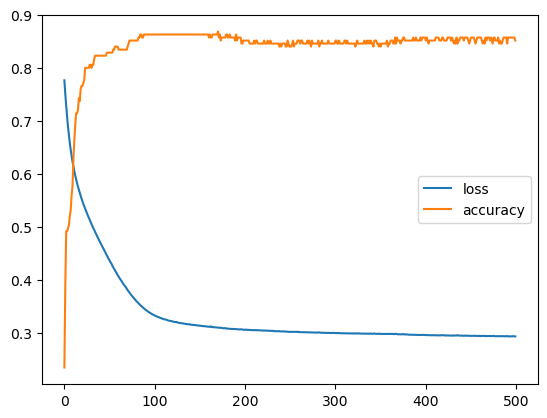

In [17]:
model = initialize_model()
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.summary()
results = model.fit(X_train, y_train, batch_size=8, epochs=500)
df= pd.DataFrame(model.history.history)
df.plot()

❓ Did the test accuracy improve?

3/3 [==============================] - 0s 3ms/step - loss: 0.2538 - accuracy: 0.8800
Accuracy: 88.00
1842/1842 [==============================] - 2s 829us/step


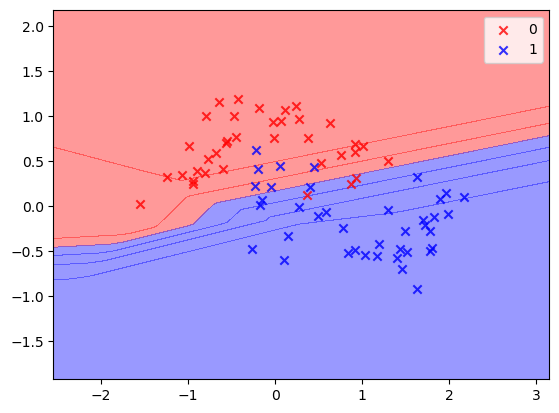

In [18]:
y_pred = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
plot_decision_regions(X_test, y_test, model, test_idx=None, resolution=0.02)

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [19]:
def initialize_model():
    # define the keras model
    model = Sequential()
    model.add(Dense(20, input_dim=2, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    return model

model = initialize_model()

❓ What is the number of parameters of your new model?

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

Epoch 1/500
22/22 [==============================] - 1s 2ms/step - loss: 0.6681 - accuracy: 0.6514
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7371
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.7771
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.7771
Epoch 5/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7886
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7771
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.8000
Epoch 8/500
22/22 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8171
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8286
Epoch 10/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8286
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9543
Epoch 84/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9543
Epoch 85/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1254 - accuracy: 0.9486
Epoch 86/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.9543
Epoch 87/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9543
Epoch 88/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9543
Epoch 89/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1231 - accuracy: 0.9486
Epoch 90/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9600
Epoch 91/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9543
Epoch 92/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.9600
Epoch 93/500


22/22 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9657
Epoch 165/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0898 - accuracy: 0.9714
Epoch 166/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0864 - accuracy: 0.9657
Epoch 167/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9714
Epoch 168/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9771
Epoch 169/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9714
Epoch 170/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0853 - accuracy: 0.9771
Epoch 171/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0837 - accuracy: 0.9714
Epoch 172/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9714
Epoch 173/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9657
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9829
Epoch 246/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9771
Epoch 247/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9771
Epoch 248/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9714
Epoch 249/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9714
Epoch 250/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9771
Epoch 251/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9714
Epoch 252/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9829
Epoch 253/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9829
Epoch 254/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9714
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9771
Epoch 327/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9714
Epoch 328/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9771
Epoch 329/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9714
Epoch 330/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9771
Epoch 331/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9771
Epoch 332/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9714
Epoch 333/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9714
Epoch 334/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9714
Epoch 335/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9771
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9714
Epoch 408/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9829
Epoch 409/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9714
Epoch 410/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9829
Epoch 411/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9714
Epoch 412/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9829
Epoch 413/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9714
Epoch 414/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9714
Epoch 415/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9771
Epoch 416/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9771
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9829
Epoch 489/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9714
Epoch 490/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9829
Epoch 491/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9771
Epoch 492/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9714
Epoch 493/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9829
Epoch 494/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9771
Epoch 495/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9829
Epoch 496/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9771
Epoch 497/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9771
Epoc

<AxesSubplot:>

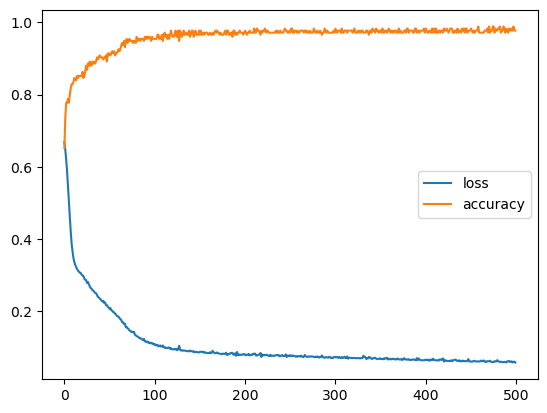

In [21]:
results = model.fit(X_train, y_train, batch_size=8, epochs=500)
accuracy_deep= pd.DataFrame(model.history.history)
accuracy_deep.plot()

In [22]:
y_pred = model.predict(X_test)
metrics = model.evaluate(X_test, y_test)
print(metrics)
accuracy_deep = metrics[1]
print(accuracy_deep)

3/3 [==============================] - 0s 3ms/step - loss: 0.2557 - accuracy: 0.9600
[0.25571078062057495, 0.9599999785423279]
0.9599999785423279


❓ Do you think we have overfitted on the noise? Check it out below

1940/1940 [==============================] - 2s 1ms/step


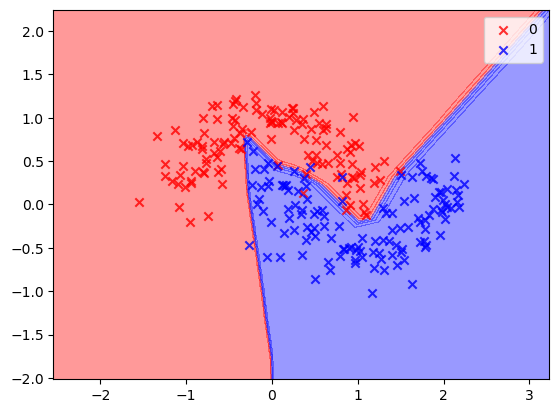

In [23]:
plot_decision_regions(X, y, model, test_idx=None, resolution=0.02)

Oui il sur entraine